## 用户聚类分析

In [20]:
# 导入需要的包
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.simplefilter("ignore")

### 0. 加载用户数据

In [2]:
# 加载user数据集

user_data = pd.read_csv("./data/user_data.csv")
user_data.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos\n
0,lsSiIjAKVl-QRxKjRErBeg,Cin,272,2010-07-13,"M19NwFwAXKRZzt8koF11hQ,QRcMZ8pJJBBZaKubHOoMDQ,...",17019,16605,16856,209,"2014,2016,2013,2011,2012,2015,2010,2017",...,299,569,284,78,1435,7397,5174,5174,1834,7829
1,om5ZiponkpRqUNa3pVPiRg,Andrea,2559,2006-01-18,"eoSSJzdprj3jxXyi94vDXg,QF0urZa-0bxga17ZeY-9lw,...",83681,10882,40110,835,"2014,2017,2011,2012,2015,2009,2013,2007,2016,2...",...,134,74,211,101,1295,2134,1556,1556,402,162
2,-lGwMGHMC_XihFJNKCJNRg,Gabe,277,2014-10-31,"Oa84FFGBw1axX8O6uDkmqg,VMVGukgapRtx3MIydAibkQ,...",45,4,55,17,NaN,...,1,0,1,0,11,20,15,15,1,8
3,D-ydMTPGWXTVm4_jjp0k9g,Leah,436,2013-04-01,"Djczq-bRn761U4FW77NUtg,9eg1MTZwxLHph77Kd9zSDw,...",15,4,4,11,"2016,2017",...,1,0,0,0,4,11,9,9,3,1
4,PcvbBOCOcs6_suRDH7TSTg,Juan,921,2012-08-16,"iN0A6QIrEFYoSGHFaknh8Q,B2HDoWNIzLlon0IhS1cmDw,...",9152,360,6006,49,"2017,2016",...,8,3,0,0,51,386,276,276,29,169


In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160392 entries, 0 to 160391
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             160392 non-null  object 
 1   name                160337 non-null  object 
 2   review_count        160392 non-null  int64  
 3   yelping_since       160392 non-null  object 
 4   friends             131911 non-null  object 
 5   useful              160392 non-null  int64  
 6   funny               160392 non-null  int64  
 7   cool                160392 non-null  int64  
 8   fans                160392 non-null  int64  
 9   elite               41333 non-null   object 
 10  average_stars       160392 non-null  float64
 11  compliment_hot      160392 non-null  int64  
 12  compliment_more     160392 non-null  int64  
 13  compliment_profile  160392 non-null  int64  
 14  compliment_cute     160392 non-null  int64  
 15  compliment_list     160392 non-nul

In [4]:
user_data.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos\n
count,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000,160392.000000
mean,88.933376,182.909166,99.853889,139.557091,8.321743,3.710920,19.264857,2.525045,1.856090,1.754745,0.796430,11.470616,25.585229,26.071762,26.071762,9.626503,8.657358
std,192.260552,1898.416067,1307.630151,1807.287131,37.129485,0.843553,214.206060,42.192164,50.391648,40.222682,34.547153,163.319644,259.810588,247.099277,247.099277,95.123895,279.474406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,3.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,3.000000,1.000000,0.000000,1.000000,3.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95.000000,29.000000,9.000000,6.000000,5.000000,4.170000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,5.000000,5.000000,2.000000,1.000000
max,11656.000000,202867.000000,192663.000000,201062.000000,6087.000000,5.000000,24171.000000,13428.000000,14078.000000,13616.000000,12620.000000,53113.000000,38202.000000,29597.000000,29597.000000,15358.000000,82533.000000


In [5]:
# 查看数据集缺失情况
missing_values_count = user_data.isnull().sum()
print(missing_values_count)

user_id                     0
name                       55
review_count                0
yelping_since               0
friends                 28481
useful                      0
funny                       0
cool                        0
fans                        0
elite                  119059
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos\n         0
dtype: int64


### 1. 数据预处理
-  删除不需要的列
-  从现有数据中创建新列

In [6]:
## 删除user_id和name列

user_data = user_data.drop(["user_id", "name"], axis=1)

In [7]:
# 增加friend_count列，用来记录每个用户的朋友个数，并删除friends列

user_data['friend_count'] = user_data['friends'].apply(lambda x: 0 if x is np.NaN else len(x.strip().split(",")))  
user_data = user_data.drop(['friends'], axis=1)
user_data.head()

,review_count,yelping_since,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos\n,friend_count
0,272,2010-07-13,17019,16605,16856,209,"2014,2016,2013,2011,2012,2015,2010,2017",3.80,5175,299,569,284,78,1435,7397,5174,5174,1834,7829,1103
1,2559,2006-01-18,83681,10882,40110,835,"2014,2017,2011,2012,2015,2009,2013,2007,2016,2...",3.94,1285,134,74,211,101,1295,2134,1556,1556,402,162,5163
2,277,2014-10-31,45,4,55,17,NaN,4.72,5,1,0,1,0,11,20,15,15,1,8,538
3,436,2013-04-01,15,4,4,11,"2016,2017",3.76,1,1,0,0,0,4,11,9,9,3,1,129
4,921,2012-08-16,9152,360,6006,49,"2017,2016",4.23,59,8,3,0,0,51,386,276,276,29,169,836


In [8]:
# 增加elite_count列，用来记录每个用户的elite status，并删除elite列

user_data['elite_count'] = user_data['elite'].apply(lambda x: 0 if x is np.NaN else len(x.strip().split(",")))  
user_data = user_data.drop(['elite'], axis=1)
user_data.head()

,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos\n,friend_count,elite_count
0,272,2010-07-13,17019,16605,16856,209,3.80,5175,299,569,284,78,1435,7397,5174,5174,1834,7829,1103,8
1,2559,2006-01-18,83681,10882,40110,835,3.94,1285,134,74,211,101,1295,2134,1556,1556,402,162,5163,12
2,277,2014-10-31,45,4,55,17,4.72,5,1,0,1,0,11,20,15,15,1,8,538,0
3,436,2013-04-01,15,4,4,11,3.76,1,1,0,0,0,4,11,9,9,3,1,129,2
4,921,2012-08-16,9152,360,6006,49,4.23,59,8,3,0,0,51,386,276,276,29,169,836,2


In [9]:
# 处理yelping_since列，
# 先转化为datetime类型，再将其拆分为两列，一列记录用户已加入年长（当前年份-加入年份），一列记录加入月份，
# 然后删除yelping_since列

user_data['yelping_since'] = pd.to_datetime(user_data['yelping_since'])

user_data['yelp_years'] = datetime.datetime.now().year - user_data['yelping_since'].dt.year
user_data['yelp_since_month'] = user_data['yelping_since'].dt.month

user_data = user_data.drop(['yelping_since'], axis=1)
user_data.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos\n,friend_count,elite_count,yelp_years,yelp_since_month
0,272,17019,16605,16856,209,3.80,5175,299,569,284,...,1435,7397,5174,5174,1834,7829,1103,8,11,7
1,2559,83681,10882,40110,835,3.94,1285,134,74,211,...,1295,2134,1556,1556,402,162,5163,12,15,1
2,277,45,4,55,17,4.72,5,1,0,1,...,11,20,15,15,1,8,538,0,7,10
3,436,15,4,4,11,3.76,1,1,0,0,...,4,11,9,9,3,1,129,2,8,4
4,921,9152,360,6006,49,4.23,59,8,3,0,...,51,386,276,276,29,169,836,2,9,8


In [10]:
# 对compliment_系列属性值进行求和
# 用求和结果代替该系列属性
columns = user_data.columns[6:17]

user_data['compliment_sum'] = np.sum(user_data[columns].values, axis=1)

user_data = user_data.drop(columns, axis=1)
user_data.head()

,review_count,useful,funny,cool,fans,average_stars,friend_count,elite_count,yelp_years,yelp_since_month,compliment_sum
0,272,17019,16605,16856,209,3.80,1103,8,11,7,35248
1,2559,83681,10882,40110,835,3.94,5163,12,15,1,8910
2,277,45,4,55,17,4.72,538,0,7,10,77
3,436,15,4,4,11,3.76,129,2,8,4,39
4,921,9152,360,6006,49,4.23,836,2,9,8,1257


In [11]:
# 数据集过大，计算能力有限，所以选择数据集前10000行数据用于聚类分析
selected_data = pd.DataFrame(user_data[:10000], columns = user_data.columns)

In [12]:
# 数据规范化
standardscaler = StandardScaler()
train_data = pd.DataFrame(standardscaler.fit_transform(selected_data), columns = user_data.columns)

In [13]:
## 查看属性之间的相关性

cov = train_data.cov()
cov.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,review_count,useful,funny,cool,fans,average_stars,friend_count,elite_count,yelp_years,yelp_since_month,compliment_sum
review_count,1.00,0.28,0.28,0.26,0.63,0.01,0.52,0.58,0.32,-0.02,0.38
useful,0.28,1.00,0.83,0.96,0.53,0.02,0.43,0.19,0.09,-0.01,0.52
funny,0.28,0.83,1.00,0.84,0.52,0.02,0.43,0.18,0.09,-0.01,0.62
cool,0.26,0.96,0.84,1.00,0.51,0.02,0.41,0.17,0.08,-0.01,0.53
fans,0.63,0.53,0.52,0.51,1.00,0.04,0.80,0.43,0.23,-0.02,0.71
average_stars,0.01,0.02,0.02,0.02,0.04,1.00,0.05,0.06,0.00,0.00,0.02
friend_count,0.52,0.43,0.43,0.41,0.80,0.05,1.00,0.38,0.19,-0.01,0.52
elite_count,0.58,0.19,0.18,0.17,0.43,0.06,0.38,1.00,0.39,-0.02,0.25
yelp_years,0.32,0.09,0.09,0.08,0.23,0.00,0.19,0.39,1.00,0.11,0.14
yelp_since_month,-0.02,-0.01,-0.01,-0.01,-0.02,0.00,-0.01,-0.02,0.11,1.00,-0.01


从属性的相关性和协方差矩阵可得：
 1. useful,funny和cool三个属性之间呈高度相关；
 2. fans和friend_count之间呈高度相关
 3. review_count与属性fans，friend_count和elite之间呈现出较强相关性（elite user review more）；

In [14]:
# PCA

pca = PCA(n_components = 0.95, random_state = 42)
train_data_pca = pca.fit_transform(train_data)

train_data_pca.shape

(10000, 8)

### 聚类分析

### 1. 基于用户的基本信息进行分类

- K-Means

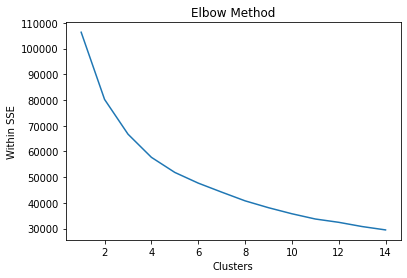

In [15]:
# 选择合适的k值

# 肘部法
sse = []
cluster_list = range(1, 15)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, random_state = 628)
    kmeans.fit(train_data_pca)
    sse.append(kmeans.inertia_)
plt.plot(cluster_list, sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Within SSE')
plt.show()

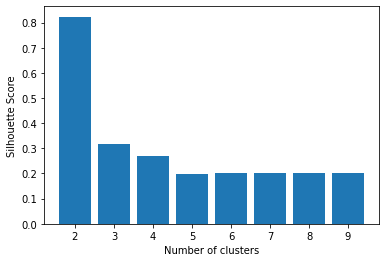

In [16]:
# 轮廓法

s = [] 
cluster_list = range(2, 10)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state = 628)
    s.append(silhouette_score(train_data_pca, kmeans.fit_predict(train_data_pca))) 
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

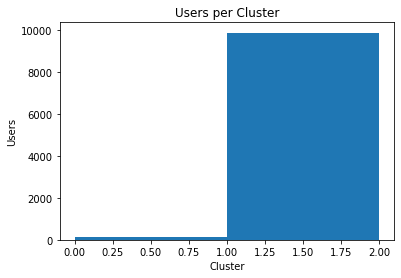

In [17]:
# 选择k值为2
k = 2
kmeans = KMeans(n_clusters = k, random_state = 628) 
labels = kmeans.fit_predict(train_data_pca)
selected_data["cluster1"] = labels

# plot cluster sizes
plt.hist(labels, bins = range(k+1))
plt.title ('Users per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Users')
plt.show()

In [18]:
selected_data["cluster1"].value_counts() 

1    9881
0     119
Name: cluster1, dtype: int64

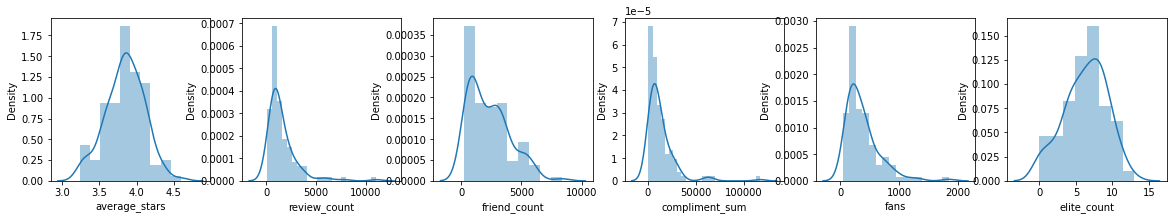

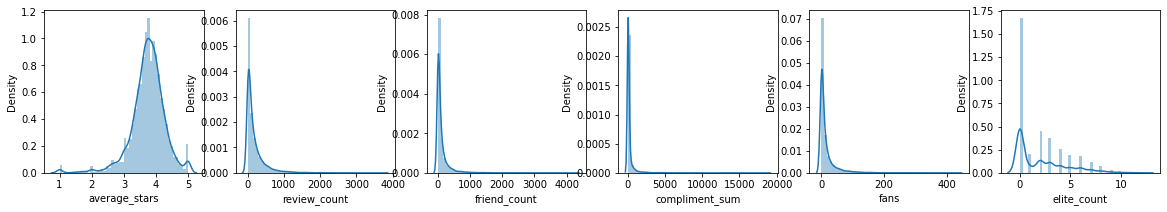

In [21]:
for i in range(0,k):
    cluster_data = selected_data[selected_data['cluster1'] == i]
    
    plt.figure(figsize=(20,3))
    plt.subplot(161)
    sns.distplot(cluster_data.average_stars)
    
    plt.subplot(162)
    sns.distplot(cluster_data.review_count)
    
    plt.subplot(163)
    sns.distplot(cluster_data.friend_count)
    
    plt.subplot(164)
    sns.distplot(cluster_data.compliment_sum)
    
    plt.subplot(165)
    sns.distplot(cluster_data.fans)
    
    plt.subplot(166)
    sns.distplot(cluster_data.elite_count)
    
    plt.show()             

根据以上展示结果可得，用户被聚类为2个簇，其中簇0主要是评论数量、朋友数量、收到称赞数量、粉丝数量较少的用户，即不活跃的用户；而簇1中的用户评论数量、朋友数量、赞美数量、粉丝数量都明显多于簇0，属于活跃用户。

- DBSCAN

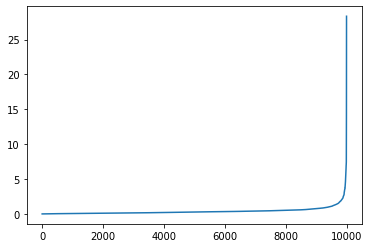

In [22]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(train_data_pca)
distances, indices = nbrs.kneighbors(train_data_pca)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
from sklearn.cluster import DBSCAN
s = []
for eps in np.arange(2, 4, 0.5):
    for min_sample in range(5, 14):
        dbscan = DBSCAN(eps = eps, min_samples = min_sample)
        dbscan.fit(train_data_pca)
        sil_score = silhouette_score(train_data_pca, dbscan.labels_, metric = 'euclidean')
        s.append((eps, min_sample, sil_score, len(set(dbscan.labels_))))
        
df_dbscan = pd.DataFrame(s, columns = ['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [24]:
df_dbscan.sort_values('sil_score', ascending = False).head()

,eps,min_samples,sil_score,number_of_clusters
29,3.5,7,0.844418,2
30,3.5,8,0.844418,2
31,3.5,9,0.843729,2
32,3.5,10,0.842908,2
34,3.5,12,0.842336,2


In [25]:
dbscan = DBSCAN(eps = 3.5, min_samples = 7)
labels = dbscan.fit_predict(train_data_pca)

selected_data["cluster2"] = labels
print(selected_data["cluster2"].value_counts())

 0    9913
-1      87
Name: cluster2, dtype: int64


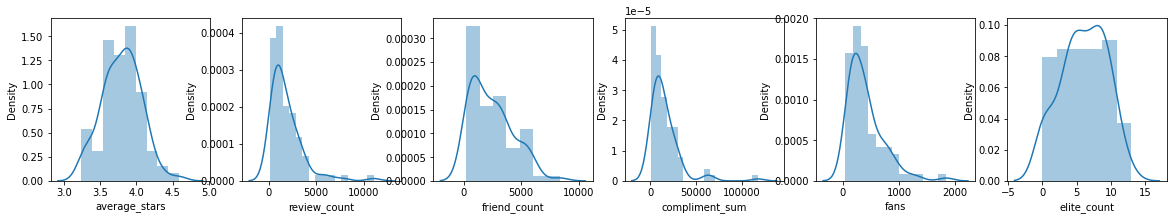

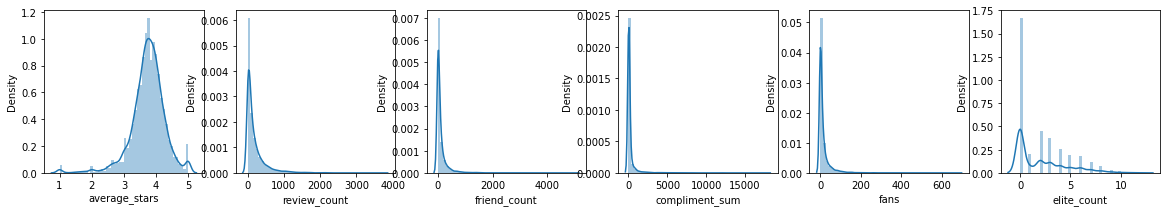

In [26]:
for i in range(-1, 1):
    cluster_data = selected_data[selected_data['cluster2'] == i]
    
    plt.figure(figsize = (20,3))
    plt.subplot(161)
    sns.distplot(cluster_data.average_stars)
    
    plt.subplot(162)
    sns.distplot(cluster_data.review_count)
    
    plt.subplot(163)
    sns.distplot(cluster_data.friend_count)
    
    plt.subplot(164)
    sns.distplot(cluster_data.compliment_sum)
    
    plt.subplot(165)
    sns.distplot(cluster_data.fans)
    
    plt.subplot(166)
    sns.distplot(cluster_data.elite_count)
    
    plt.show()             

DBSCAN分类结果与Kmeans基本相同。

### 2.基于用户的访问轨迹进行聚类分析

In [27]:
# 加载用户轨迹数据集

user_trajectories = pd.read_csv("./data/user_trajectories.csv")
user_trajectories.head()

,user_id,business_id,date,latitude,longitude
0,--7gjElmOrthETJ8XqzMBw,IiG1_hV_TyQgLzh2j8Zncg,2014-11-16,43.689561,-79.395044
1,--Br-QsbO9ad5GbZxVGxaw,x6PA-2j7LpZAYFo2VojmQQ,2016-08-24,43.651099,-79.379162
2,--BumyUHiO_7YsHurb9Hkw,r_BrIgzYcwo1NAuG9dLbpg,2017-01-13,43.647866,-79.388642
3,--BumyUHiO_7YsHurb9Hkw,iZJ5pdY558VodrEumGyVug,2017-01-19,43.661194,-79.428737
4,--BumyUHiO_7YsHurb9Hkw,xsl-d_opm3AU5H2Z-im33g,2017-01-23,43.654646,-79.422938


In [28]:
# 选择其中50个用户的餐馆访问数据作为数据集
user_count = user_trajectories["user_id"].value_counts()
user_list=list(user_count.index)

data = pd.DataFrame(user_trajectories[user_trajectories["user_id"].isin(user_list[50:100])])

- 将经纬度转化为墨卡托坐标

In [29]:
import math

latitudes = data.latitude
longitudes = data.longitude

earthRad = 6378137.0
x = round(longitudes * math.pi / 180 * earthRad, 6) 
a = latitudes * math.pi / 180
y = [round(earthRad / 2 * math.log((1.0 + math.sin(i)) / (1.0 - math.sin(i))), 6) for i in a]

data["x"] = x
data["y"] = y
data.head()

,user_id,business_id,date,latitude,longitude,x,y
2278,-_2h2cJlBOWAYrfplMU-Cg,zA6gnF5aPBGoOm6uIbKt-A,2010-12-04,43.648346,-79.388328,-8.837468e+06,5.411183e+06
2279,-_2h2cJlBOWAYrfplMU-Cg,FkJTuuqeJL4jHi2FojX_fg,2012-03-18,43.648330,-79.386767,-8.837294e+06,5.411181e+06
2280,-_2h2cJlBOWAYrfplMU-Cg,WTyohERz470hlBtcQ6HtiA,2012-03-19,43.656745,-79.380484,-8.836595e+06,5.412476e+06
2281,-_2h2cJlBOWAYrfplMU-Cg,UWWBnnlVDW5US-TaIsNoKw,2012-03-19,43.647345,-79.379710,-8.836509e+06,5.411029e+06
2282,-_2h2cJlBOWAYrfplMU-Cg,Lzr34VkDJQ6l8oWq9MptAA,2012-03-19,43.662462,-79.383730,-8.836956e+06,5.413355e+06


- 将地理位置划分成30x30的单元格

In [30]:
cell =[]
x_step = (max(x)-min(x))/30
y_step = (max(y)-min(y))/30

data["cell"] = 0

for index, row in data.iterrows():
    x_offset = math.floor((row["x"]-min(x))/x_step)
    y_offset = math.floor((row["y"]-min(y))/y_step)
    data.loc[index, "cell"] = y_offset*30 + x_offset

data.head()

,user_id,business_id,date,latitude,longitude,x,y,cell
2278,-_2h2cJlBOWAYrfplMU-Cg,zA6gnF5aPBGoOm6uIbKt-A,2010-12-04,43.648346,-79.388328,-8.837468e+06,5.411183e+06,165
2279,-_2h2cJlBOWAYrfplMU-Cg,FkJTuuqeJL4jHi2FojX_fg,2012-03-18,43.648330,-79.386767,-8.837294e+06,5.411181e+06,165
2280,-_2h2cJlBOWAYrfplMU-Cg,WTyohERz470hlBtcQ6HtiA,2012-03-19,43.656745,-79.380484,-8.836595e+06,5.412476e+06,196
2281,-_2h2cJlBOWAYrfplMU-Cg,UWWBnnlVDW5US-TaIsNoKw,2012-03-19,43.647345,-79.379710,-8.836509e+06,5.411029e+06,166
2282,-_2h2cJlBOWAYrfplMU-Cg,Lzr34VkDJQ6l8oWq9MptAA,2012-03-19,43.662462,-79.383730,-8.836956e+06,5.413355e+06,225


In [31]:
## 保存单元格数据
data.to_csv("./data/cell.csv", index = False)

In [32]:
data = pd.read_csv("./data/cell.csv")

# 统计每个单元格被访问次数
cell_count = data["cell"].value_counts()
# print(cell_count)

# 保留被访问次数>20的单元格，避免噪音点的干扰
cell_list =list(cell_count[cell_count>20].index)


data = data[data["cell"].isin(cell_list)]

cell_x = []
cell_y = []
for i in cell_list:
    x_offset = i % 30
    y_offset = i / 30
    cell_x.append(min(x)+(x_offset+0.5)*x_step)
    cell_y.append(min(y)+(y_offset+0.5)*y_step)
    
cell_df = pd.DataFrame({"cell_id": cell_list, "cell_x": cell_x, "cell_y": cell_y})
cell_df.head()

,cell_id,cell_x,cell_y
0,194,-8.839076e+06,5.412748e+06
1,164,-8.839076e+06,5.411289e+06
2,195,-8.837525e+06,5.412796e+06
3,196,-8.835975e+06,5.412845e+06
4,165,-8.837525e+06,5.411337e+06


- 计算两两单元格之间的距离，便于后续计算轨迹相似度

In [33]:
# 单元格之间的距离矩阵

n = cell_df.shape[0]
cell_dis_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(i+1, n):
        c1_x = cell_df.loc[i, "cell_x"]
        c1_y = cell_df.loc[i, "cell_y"]
        c2_x = cell_df.loc[j, "cell_x"]
        c2_y = cell_df.loc[j, "cell_x"]
        cell_dis_matrix[[i],[j]] = math.sqrt((c1_x-c2_x)**2 + (c1_y-c2_y)**2)
        cell_dis_matrix[[j],[i]] = cell_dis_matrix[[i],[j]]

cell_dis_matrix

array([[       0.        , 14251823.26733678, 14250272.98247401, ...,
        14239425.71540778, 14259577.22037888, 14245623.14036772],
       [14251823.26733678,        0.        , 14248814.10862951, ...,
        14237966.84210812, 14258118.34674133, 14244164.26665283],
       [14250272.98247401, 14248814.10862951,        0.        , ...,
        14239473.07850645, 14259626.77659635, 14245671.1789433 ],
       ...,
       [14239425.71540778, 14237966.84210812, 14239473.07850645, ...,
               0.        , 14284779.22036126, 14270813.02651586],
       [14259577.22037888, 14258118.34674133, 14259626.77659635, ...,
        14284779.22036126,        0.        , 14246844.35167537],
       [14245623.14036772, 14244164.26665283, 14245671.1789433 , ...,
        14270813.02651586, 14246844.35167537,        0.        ]])

In [34]:
## 将用户访问餐馆数据转换为序列形式

user_count = data["user_id"].value_counts()
user_list=list(user_count.index)

trajectories = pd.DataFrame(columns=('user_id','trajectory'))
i = -1
for user_id in user_list:
    i = i+1
    user_data = data[data['user_id'] == user_id]
    trajectory = [] 
    for name, row in user_data.iterrows():
        trajectory.append(row["cell"]) 
        if len(trajectory) >= 100:
            break
    
    trajectories.loc[i] = [user_id, trajectory]

trajectories.head()

,user_id,trajectory
0,dwFgmKO-PzJalyHDSGAT8A,"[255, 193, 163, 225, 255, 164, 255, 224, 285, ..."
1,gS4QCL6j_umAyfJXBGAZJQ,"[193, 196, 164, 164, 165, 164, 164, 193, 166, ..."
2,Nq6e5N8bjgD9B46O4va_zA,"[162, 165, 224, 224, 194, 224, 165, 164, 224, ..."
3,VrMaL32wWNed_DjOcsO3Ng,"[166, 226, 226, 288, 225, 166, 196, 164, 228, ..."
4,zWWcik1fRPZviBCQLC26FQ,"[225, 225, 194, 195, 226, 225, 164, 225, 196, ..."


In [35]:
trajectories.to_csv("./data/trajectories_list.csv")

In [36]:
trajectories = pd.read_csv("./data/trajectories_list.csv", index_col = 0)
trajectories.head()

,user_id,trajectory
0,dwFgmKO-PzJalyHDSGAT8A,"[255, 193, 163, 225, 255, 164, 255, 224, 285, ..."
1,gS4QCL6j_umAyfJXBGAZJQ,"[193, 196, 164, 164, 165, 164, 164, 193, 166, ..."
2,Nq6e5N8bjgD9B46O4va_zA,"[162, 165, 224, 224, 194, 224, 165, 164, 224, ..."
3,VrMaL32wWNed_DjOcsO3Ng,"[166, 226, 226, 288, 225, 166, 196, 164, 228, ..."
4,zWWcik1fRPZviBCQLC26FQ,"[225, 225, 194, 195, 226, 225, 164, 225, 196, ..."


#### 1. 使用DTW计算两个轨迹之间的距离

In [37]:
def DTW(s1, s2):
    l1 = len(s1)
    l2 = len(s2)
    paths = np.full((l1 + 1, l2 + 1), np.inf)  # 全部赋予无穷大
    paths[0, 0] = 0
    for i in range(l1):
        for j in range(l2):
            index_1 = cell_list.index(s1[i])
            index_2 = cell_list.index(s2[j])
            d = cell_dis_matrix[[index_1],[index_2]]
            paths[i + 1, j + 1] = d + min(paths[i, j + 1], paths[i + 1, j], paths[i, j])

    paths = np.sqrt(paths)
    distance = paths[l1, l2] / min(l1,l2)
    return distance

In [38]:
n = trajectories.shape[0]
distance_matrix = np.zeros((n,n))
for i in range(n):
    user1 = ast.literal_eval(trajectories.loc[i, "trajectory"])
    for j in range(i+1, n):
        user2 = ast.literal_eval(trajectories.loc[j, "trajectory"])
        distance_matrix[i,j] = DTW(user1,user2)
        distance_matrix[j,i] = distance_matrix[i,j]

print(distance_matrix)

[[  0.         350.07695737 350.08836496 ... 461.64381254 471.13226176
  542.56337939]
 [350.07695737   0.         345.98418941 ... 451.34132479 453.78295007
  536.46142715]
 [350.08836496 345.98418941   0.         ... 464.10769615 453.77250625
  533.42783273]
 ...
 [461.64381254 451.34132479 464.10769615 ...   0.         429.49587508
  428.0089103 ]
 [471.13226176 453.78295007 453.77250625 ... 429.49587508   0.
  468.12623171]
 [542.56337939 536.46142715 533.42783273 ... 428.0089103  468.12623171
    0.        ]]


In [39]:
min_dist = np.min(distance_matrix[distance_matrix>0])
max_dist = np.max(distance_matrix)
distance_matrix2 = np.zeros((n,n))
for i in range(n):
    for j in range(i+1, n):
        distance_matrix2[i, j] = (distance_matrix[i,j]-min_dist) / (max_dist-min_dist)
        distance_matrix2[j,i] = distance_matrix2[i,j]
print(distance_matrix2)

[[0.         0.16739173 0.16743819 ... 0.62184834 0.66049861 0.95146625]
 [0.16739173 0.         0.15072024 ... 0.57988217 0.58982789 0.92661054]
 [0.16743819 0.15072024 0.         ... 0.63188473 0.58978535 0.9142535 ]
 ...
 [0.62184834 0.57988217 0.63188473 ... 0.         0.49089688 0.48483988]
 [0.66049861 0.58982789 0.58978535 ... 0.49089688 0.         0.64825384]
 [0.95146625 0.92661054 0.9142535  ... 0.48483988 0.64825384 0.        ]]


- 基于用户轨迹的距离矩阵，使用层次聚类对用户进行聚类处理

In [40]:
def get_cluster_indices(cluster_assignments):
    n = cluster_assignments.max()
    indices = []
    for cluster_number in range(1, n + 1):
        indices.append(np.where(cluster_assignments == cluster_number)[0])
    
    return indices

def hierarchy_cluster(distance_matrix):
    y = squareform(distance_matrix)
    Z = linkage(y, method = 'complete')
    plt.figure(figsize = (15, 8))
    dendrogram(Z)
    plt.show()
    cluster_assignments = fcluster(Z, 0.2, criterion = 'distance')
    print(type(cluster_assignments))
    num_clusters = cluster_assignments.max()
    indices = get_cluster_indices(cluster_assignments)
 
    return num_clusters, indices

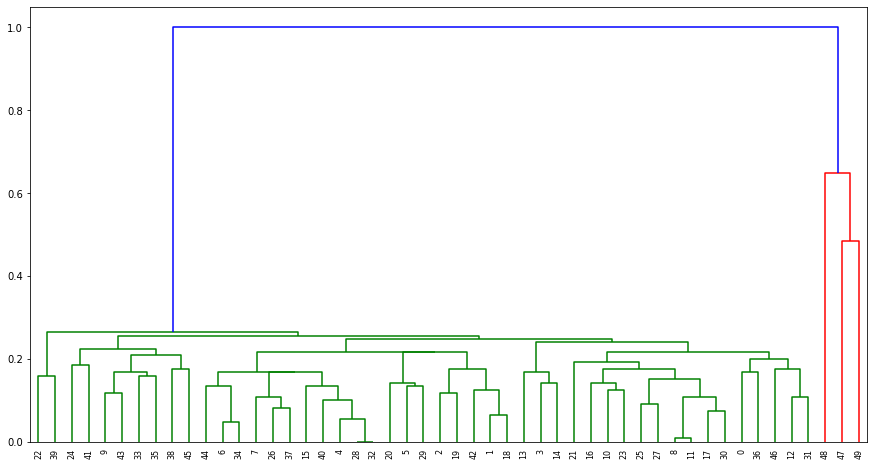

<class 'numpy.ndarray'>
14 clusters
cluster 1 is [22 39]
cluster 2 is [24 41]
cluster 3 is [ 9 33 35 43]
cluster 4 is [38 45]
cluster 5 is [ 4  6  7 15 26 28 32 34 37 40 44]
cluster 6 is [ 5 20 29]
cluster 7 is [ 1  2 18 19 42]
cluster 8 is [ 3 13 14]
cluster 9 is [ 8 10 11 16 17 21 23 25 27 30]
cluster 10 is [ 0 36]
cluster 11 is [12 31 46]
cluster 12 is [47]
cluster 13 is [49]
cluster 14 is [48]


In [41]:
from scipy.spatial.distance import pdist, squareform
num_clusters, indices = hierarchy_cluster(distance_matrix2)

print ("%d clusters" % num_clusters)
for k, ind in enumerate(indices):
    print("cluster", k + 1, "is", ind)

In [42]:
trajectories["cluster"] = 0
for k, ind in enumerate(indices):
    for i in ind:
        trajectories.loc[i, "cluster"] = k
trajectories.head()

,user_id,trajectory,cluster
0,dwFgmKO-PzJalyHDSGAT8A,"[255, 193, 163, 225, 255, 164, 255, 224, 285, ...",9
1,gS4QCL6j_umAyfJXBGAZJQ,"[193, 196, 164, 164, 165, 164, 164, 193, 166, ...",6
2,Nq6e5N8bjgD9B46O4va_zA,"[162, 165, 224, 224, 194, 224, 165, 164, 224, ...",6
3,VrMaL32wWNed_DjOcsO3Ng,"[166, 226, 226, 288, 225, 166, 196, 164, 228, ...",7
4,zWWcik1fRPZviBCQLC26FQ,"[225, 225, 194, 195, 226, 225, 164, 225, 196, ...",4


In [43]:
import folium
import os

# Create map and display it
# 多伦多经纬度
latitude = 43.66
longitude = -79.38
color = ['royalblue', 'yellow', 'red', 'green', 'purple', 'orange', 'grey', 'c', 'gold', 'y']

for i in range(num_clusters):
    cluster_data = trajectories[trajectories["cluster"] == i]
    trt_map = folium.Map(location=[latitude, longitude], zoom_start=12)
    j = -1
    for name,row in cluster_data.iterrows():
        user_data = data[data["user_id"] == row["user_id"]]
        j = (j+1)% 10
        trajectory = []
        for name, row in user_data.iterrows():
            trajectory.append([row['latitude'],row['longitude']])
            folium.CircleMarker( 
                [row['latitude'],row['longitude']],
                radius=4,  
                color='grey',
                fill=False).add_to(trt_map) 
            if len(trajectory) >= 100:
                break

        folium.PolyLine(trajectory, weight=3, opacity=0.6, color=color[j]).add_to(trt_map)
    path = './result/cluster' + str(i) + '.html'
    trt_map.save(path)

#### 2. 使用LCSS计算两个轨迹之间的相似度

In [44]:
def LCSS(s1, s2):
    len1 = len(s1)
    len2 = len(s2)
    C = [ [0] * (len2+1) for _ in range(len1+1)]
    for i in range(1, len1+1):
        for j in range(1, len2+1):
            if s1[i-1] == s2[j-1]:
                C[i][j] = C[i-1][j-1] + 1
            else:
                C[i][j] = max(C[i][j-1], C[i-1][j])
                
    lcss = 1-float(C[len1][len2])/min([len1,len2])
    return lcss

In [45]:
n = trajectories.shape[0]
lcss_distance_matrix = np.zeros((n,n))
for i in range(n):
    user1 = ast.literal_eval(trajectories.loc[i, "trajectory"])
    for j in range(i+1, n):
        user2 = ast.literal_eval(trajectories.loc[j, "trajectory"])
        lcss_distance_matrix[[i],[j]] = LCSS(user1,user2)
        lcss_distance_matrix[[j],[i]] = lcss_distance_matrix[[i], [j]]

print(lcss_distance_matrix)

[[0.         0.76       0.74       ... 0.87179487 0.73972603 0.86363636]
 [0.76       0.         0.71       ... 0.80769231 0.69863014 0.83333333]
 [0.74       0.71       0.         ... 0.79487179 0.65753425 0.78787879]
 ...
 [0.87179487 0.80769231 0.79487179 ... 0.         0.76712329 0.62121212]
 [0.73972603 0.69863014 0.65753425 ... 0.76712329 0.         0.8030303 ]
 [0.86363636 0.83333333 0.78787879 ... 0.62121212 0.8030303  0.        ]]


- 基于用户轨迹的相似度矩阵，使用层次聚类对用户进行聚类

In [46]:
def hierarchy_cluster2(distance_matrix):
    y = squareform(distance_matrix)
    Z = linkage(y, method = 'complete')
    plt.figure(figsize = (15, 8))
    dendrogram(Z)
    plt.show()
    cluster_assignments = fcluster(Z, 0.8, criterion = 'distance')
    print(type(cluster_assignments))
    num_clusters = cluster_assignments.max()
    indices = get_cluster_indices(cluster_assignments)
 
    return num_clusters, indices

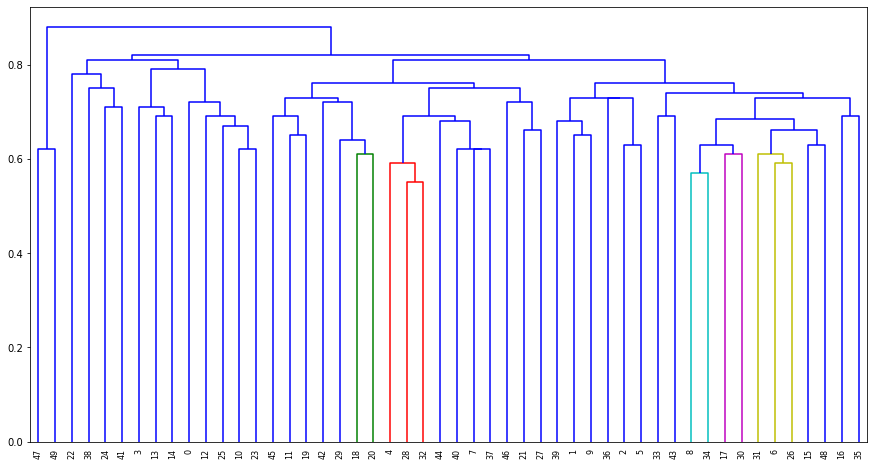

<class 'numpy.ndarray'>
5 clusters
cluster 1 is [47 49]
cluster 2 is [22 24 38 41]
cluster 3 is [ 0  3 10 12 13 14 23 25]
cluster 4 is [ 4  7 11 18 19 20 21 27 28 29 32 37 40 42 44 45 46]
cluster 5 is [ 1  2  5  6  8  9 15 16 17 26 30 31 33 34 35 36 39 43 48]


In [47]:
num_clusters, indices = hierarchy_cluster2(lcss_distance_matrix)

print ("%d clusters" % num_clusters)
for k, ind in enumerate(indices):
    print("cluster", k + 1, "is", ind)

- 从上面的层次聚类树状图可得，用户轨迹之间的距离（相似度）区分度不大，聚类效果不佳。

In [48]:
trajectories["cluster2"] = 0
for k, ind in enumerate(indices):
    for i in ind:
        trajectories.loc[i, "cluster2"] = k
trajectories.head()

,user_id,trajectory,cluster,cluster2
0,dwFgmKO-PzJalyHDSGAT8A,"[255, 193, 163, 225, 255, 164, 255, 224, 285, ...",9,2
1,gS4QCL6j_umAyfJXBGAZJQ,"[193, 196, 164, 164, 165, 164, 164, 193, 166, ...",6,4
2,Nq6e5N8bjgD9B46O4va_zA,"[162, 165, 224, 224, 194, 224, 165, 164, 224, ...",6,4
3,VrMaL32wWNed_DjOcsO3Ng,"[166, 226, 226, 288, 225, 166, 196, 164, 228, ...",7,2
4,zWWcik1fRPZviBCQLC26FQ,"[225, 225, 194, 195, 226, 225, 164, 225, 196, ...",4,3


In [49]:
# 按用户id获取用户访问餐馆轨迹，然后可视化
import folium
import os

# Create map and display it
# 多伦多经纬度
latitude = 43.66
longitude = -79.38

trt_map = folium.Map(location=[latitude, longitude], zoom_start = 12)

color = ['royalblue', 'yellow', 'red', 'green', 'purple', 'orange', 'grey', 'c', 'gold', 'y', 'white']
cluster_data = trajectories[trajectories["cluster"] == 0]

for name,row in cluster_data.iterrows():
    user_data = data[data["user_id"] == row["user_id"]]
    j = (j+1)% 10
    trajectory = []
    for name, row in user_data.iterrows():
        trajectory.append([row['latitude'],row['longitude']])
        folium.CircleMarker( 
            [row['latitude'],row['longitude']],
            radius=4,  # define how big you want the circle markers to be
            color='grey',
            fill=False).add_to(trt_map) 
        if len(trajectory) >= 100:
            break

    folium.PolyLine(trajectory, weight = 3, opacity = 0.6, color = color[j]).add_to(trt_map)

trt_map